In [3]:
import os
def notify(text, title, subtitle="", sound="Glass"):
    os.system("""
              osascript -e 'display notification "{}" with title "{}" subtitle "{}" sound name "{}"'
              """.format(text, title, subtitle, sound))

In [5]:
##reads real catalogue

from astropy.table import Table
SDSS=Table.read('..\codes\cat\galaxy_DR12v5_LOWZ_South.fits')
#inc_lowz=False  
#if ((inc_lowz)!=True):
    #SDSS=SDSS[SDSS['z']>=0.5]
#len(SDSS)

Text(0, 0.5, 'dec')

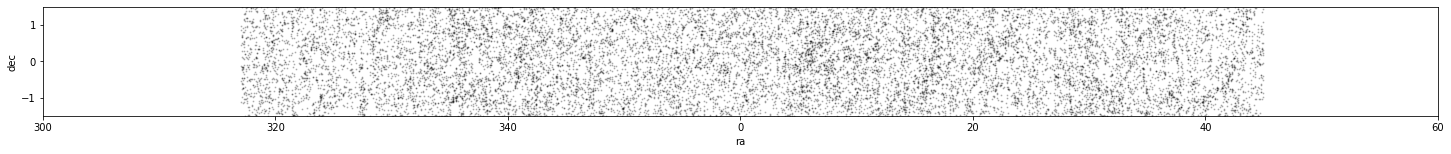

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline
gra = SDSS['RA']
#dra = d['ra']
gdec = SDSS['DEC']
#ddec = d['dec']
gra[gra > 180] -= 360
#dra[dra > 180] -= 360

# Plot the data
fig, ax = plt.subplots(figsize=(25,2))
ax.scatter(gra,gdec,1.,color='k',alpha=.2)
ax.axis([-60,60,-1.5,1.5])
#ax.scatter(dra,ddec,10)

# Set the ticks so that negative ticks represent >180 numbers
ticks = ax.get_xticks()
ticks[ticks < 0] += 360
ax.set_xticklabels([int(tick) for tick in ticks])
ax.set_xlabel('ra')
ax.set_ylabel('dec')

#ax.saveplot('name.pdf')

Text(0, 0.5, 'DEC')

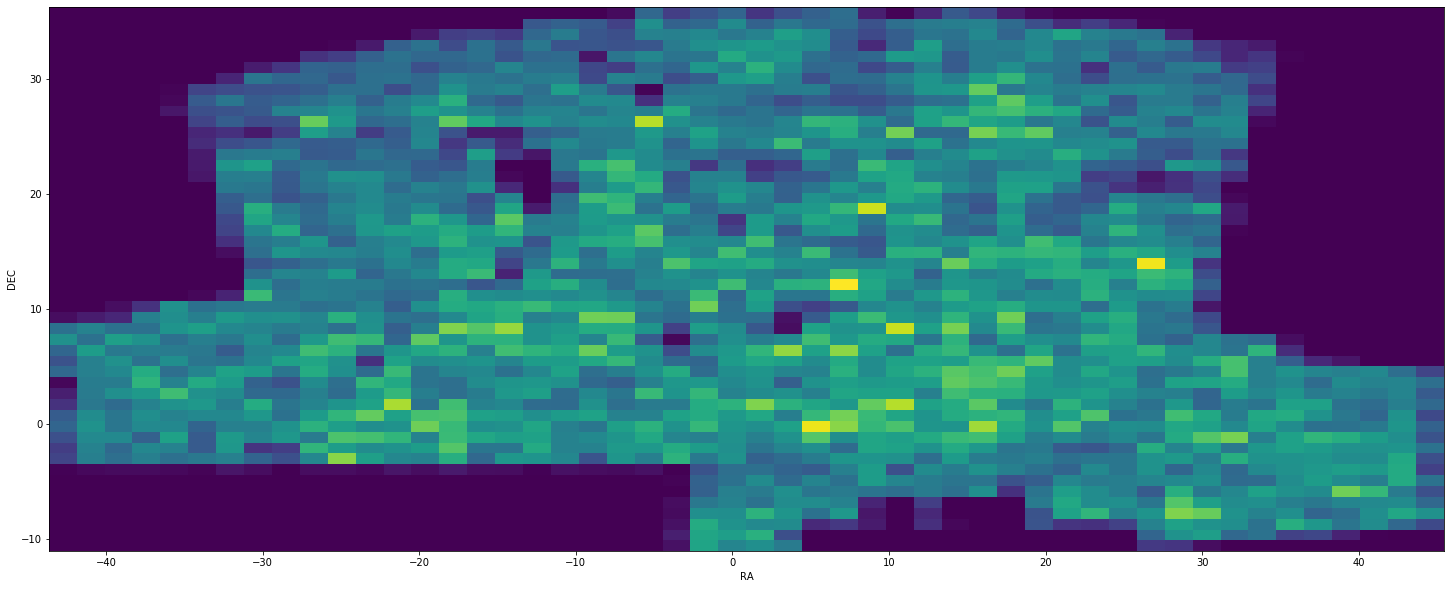

In [9]:
fig, h2 = plt.subplots(figsize=(25,10))
h2.hist2d(SDSS['RA'],SDSS['DEC'], bins=50)
h2.set_xlabel('RA')
h2.set_ylabel('DEC')

In [10]:
raMin=SDSS['RA'].min()
raMax=SDSS['RA'].max()
print (raMin, raMax)

-43.61878349928685 45.441787537020275


In [52]:
patches=[]
patches.append(SDSS[(SDSS['ra']>=-60) & (SDSS['ra']<=-43)])
patches.append(SDSS[((SDSS['ra']>-43) & (SDSS['ra']<=-12)) | (((SDSS['dec']>=1) | (SDSS['dec']<=-1)) &((SDSS['ra']>-12) &(SDSS['ra']<=-4)))])
patches.append(SDSS[((SDSS['ra']>-12) & (SDSS['ra']<=-4)) & ((SDSS['dec']<1) & (SDSS['dec']>-1))])
patches.append(SDSS[((SDSS['ra']>-4) & (SDSS['ra']<=0)) & ((SDSS['dec']<1) & (SDSS['dec']>-1))])
patches.append(SDSS[((SDSS['ra']>0) & (SDSS['ra']<=45)) | (((SDSS['dec']>=1) | (SDSS['dec']<=-1)) &((SDSS['ra']>-4) &(SDSS['ra']<=0)))])
patches.append(SDSS[(SDSS['ra']>45) & (SDSS['ra']<=54)])
patches.append(SDSS[(SDSS['ra']>54) & (SDSS['ra']<=57)])
patches.append(SDSS[(SDSS['ra']>57)])



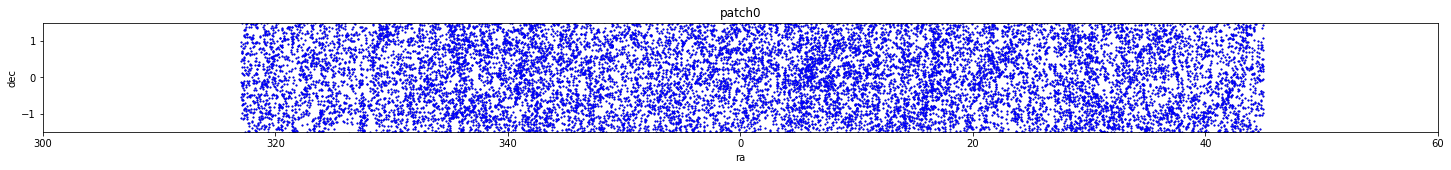

In [13]:
##for i, patch in enumerate(patches):
for i in range(1):
    gra = SDSS['RA']
    pra = SDSS['RA']
    gdec = SDSS['DEC']
    pdec = SDSS['DEC']
    gra[gra > 180] -= 360
    pra[pra > 180] -= 360

    # Plot the data
    fig, ax = plt.subplots(figsize=(25,2))
    ax.scatter(gra,gdec,1.,color='k',alpha=.5)
    ax.axis([-60,60,-1.5,1.5])
    if ((i==0) | (i==7)):
        ax.scatter(pra,pdec,1.,color='b')
    else:
        ax.scatter(pra,pdec,1.,color='b',alpha=.5)

    # Set the ticks so that negative ticks represent >180 numbers
    ticks = ax.get_xticks()
    ticks[ticks < 0] += 360
    ax.set_xticklabels([int(tick) for tick in ticks])
    ax.set_xlabel('ra')
    ax.set_ylabel('dec')
    ax.set_title('patch'+str(i))

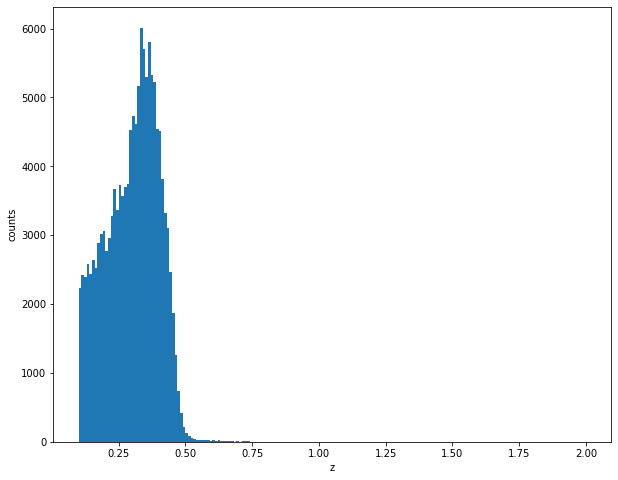

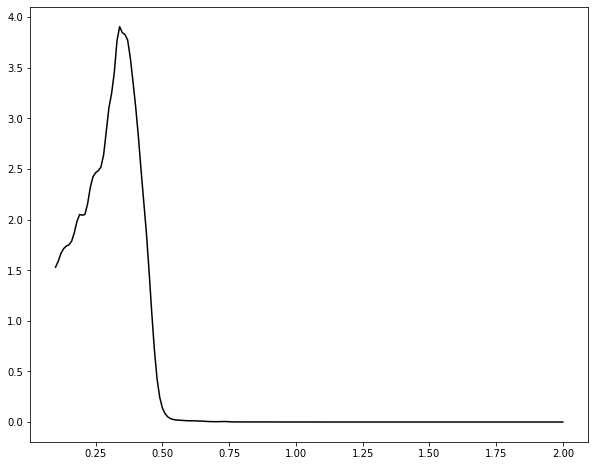

In [22]:
import numpy as np
from scipy import stats
#if inc_lowz: l=0.1
#else: l=0.5
l = 0.1
b=np.arange(l,2.01,0.01)

zdist=[]
##for p in patches:
##    zdist.append(p['z'])
fig, zt = plt.subplots(figsize=(10,8))
zt.hist(SDSS['Z'],bins=b,stacked=True)
zt.set_xlabel('z')
zt.set_ylabel('counts')

kernel = stats.gaussian_kde(SDSS['Z'])
evaluated=kernel.evaluate(b)
fig2, ztsm=plt.subplots(figsize=(10,8))
ztsm.plot(b,evaluated, color='k')

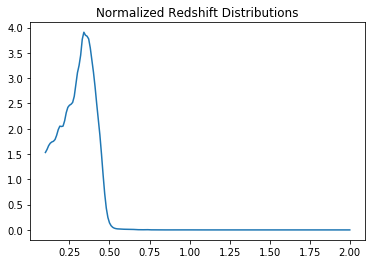

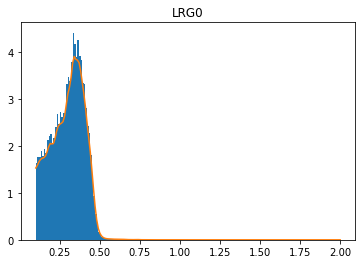

In [23]:
import scipy
from scipy import stats
import math

evalu=[]
fig1, al = plt.subplots()
al.set_title('Normalized Redshift Distributions')
#for i, p in enumerate(patches):
kernel = stats.gaussian_kde(SDSS['Z'])
fig2, sm = plt.subplots()
sm.hist(SDSS['Z'],bins=b,density=True)
evaluated=kernel.evaluate(b)
evalu.append(evaluated)
sm.plot(b,evaluated)
al.plot(b,evaluated)
sm.set_title('LRG'+str(i))
fig1.savefig('LRGNormZdist.pdf')

In [25]:
dmm=[]
'''for i, p in enumerate(patches):
    if i==0:
        print(i, p['dec'].min(), p['dec'].max())
    if i==5:
        print(i, p['dec'].min(), p['dec'].max())
    if i==6:
        print(i, p['dec'].min(), p['dec'].max())
    if i==7:
        print(i, p['dec'].min(), p['dec'].max())
    dmm.append([p['dec'].min(),p['dec'].max()])'''
    
dmm = [[SDSS['DEC'].min()],[SDSS['DEC'].max()]]
print (dmm)

[[-10.995383804523302], [36.23525622894318]]


In [27]:
import numpy as np
'''area=np.empty(8, dtype=float)
area[0]=((-43-raMin)*dmm[0][1]-dmm[0][0])
area[1]=((-12--43)*3+(-4--12)*1)
area[2]=((-4--12)*2)
area[3]=((0--4)*2)
area[4]=((45-0)*3+(0--4)*1)
area[5]=((54-45)*dmm[5][1]-dmm[5][0])
area[6]=((57-54)*dmm[6][1]-dmm[6][0])
area[7]=((raMax-57)*dmm[7][1]-dmm[7][0])'''

area = np.array(dmm)
print (area)

[[-10.9953838 ]
 [ 36.23525623]]


In [29]:
import math
ddensity=np.empty(8, dtype=float)
temp=np.empty(8, dtype=float)
pop=np.empty(8, dtype=int)
s82area=120*3
#print ('patch\tgal\tpop\tddens\tblockpop')
for i in range(1):
    ddensity[i]=20/area[i]
    pop[i]=20
    print (i, '\t', 1,'\t',pop[i],'\t', int(round(ddensity[i])),end='')
    if i==1:
        rp1=pop[1]
        pop[1]=int(math.ceil(ddensity[1]*(-4--43)*3))
        print ('\t',pop[1],end='')
    '''if i==4:
        rp4=pop[4]
        pop[4]=int(math.ceil(ddensity[4]*(45--4)*3))
        print ('\t',pop[4],end='')'''
    print (ddensity)
    
    


0 	 1 	 20 	 -2[-1.81894515  0.          0.          0.          0.          0.
  0.          0.        ]


In [61]:
from numpy import random as rand

def CDF(x):
    return np.cumsum(x)/np.cumsum(x)[-1]

random=[]
for i, p in enumerate(patches):
    r,d,z=([] for i in range(3))
    d=[]
    z=[]
    q=CDF(evalu[i])
    inv=scipy.interpolate.interp1d(CDF(evalu[i]), b)
    for j in range (pop[i]):
        if i==0:
            r.append(rand.uniform(raMin,-43))
            d.append(rand.uniform(dmm[0][0],dmm[0][1]))
        if i==1:
            r.append(rand.uniform(-43,-4))
            d.append(rand.uniform(-1.5,1.5))
        if i==2:
            r.append(rand.uniform(-12,-4))
            d.append(rand.uniform(-1,1))
        if i==3:
            r.append(rand.uniform(-4,0))
            d.append(rand.uniform(-1,1))
        if i==4:
            r.append(rand.uniform(-4,45))
            d.append(rand.uniform(-1.5,1.5))
        if i==5:
            r.append(rand.uniform(45,54))
            d.append(rand.uniform(dmm[5][0],dmm[5][1]))
        if i==6:
            r.append(rand.uniform(54,57))
            d.append(rand.uniform(dmm[6][0],dmm[6][1]))
        if i==7:
            r.append(rand.uniform(57,raMax))
            d.append(rand.uniform(dmm[7][0],dmm[7][1]))
        a=rand.uniform(q.min(),q.max())
        z.append(inv(a))
    temp=Table([r, d, z], names=('ra', 'dec', 'z'), meta={'name': 'first table'})
    if i==1:
        print ('in\texpect\t\tout')
        print (len(temp),'\t',end='')
        temp=temp[((temp['ra']>-43) & (temp['ra']<=-12)) | (((temp['dec']>=1) | (temp['dec']<=-1)) &((temp['ra']>-12) &(temp['ra']<=-4)))]
        print (rp1,':\t',len(temp))
        print ()
    if i==4:
        print ('in\texpect\t\tout')
        print (len(temp),'\t',end='')
        temp=temp[((temp['ra']>0) & (temp['ra']<=45)) | (((temp['dec']>=1) | (temp['dec']<=-1)) &((temp['ra']>-4) &(temp['ra']<=0)))]
        print (rp4,':\t',len(temp))
    temp[temp['ra']<0]['ra']+=360
    random.append(temp)

in	expect		out
200731 	173280 :	 173126

in	expect		out
498722 	471580 :	 471790


In [62]:
from astropy.table import vstack
total=Table([[],[],[]], names=('ra', 'dec', 'z'), meta={'name': 'first table'})
totalb=Table([[],[],[]], names=('ra', 'dec', 'z'), meta={'name': 'first table'})
for i, r in enumerate(random):
    total=vstack([total,r])
    print(i,end=' ')
    if ((i!=0) & (i!=7)):
        print('b',end='')
        totalb=vstack([totalb,r])
    print()
random.append(total)
random.append(totalb)

0 
1 b
2 b
3 b
4 b
5 b
6 b
7 


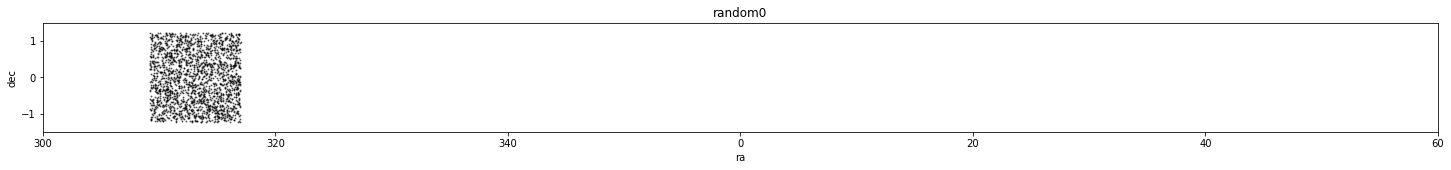

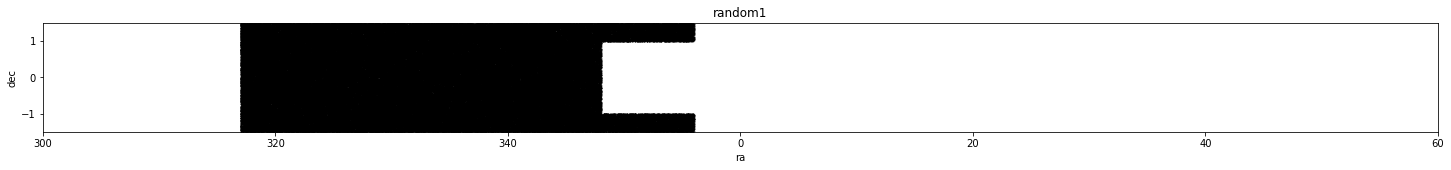

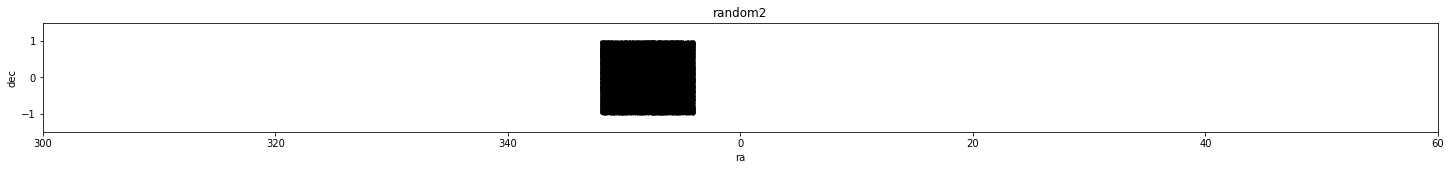

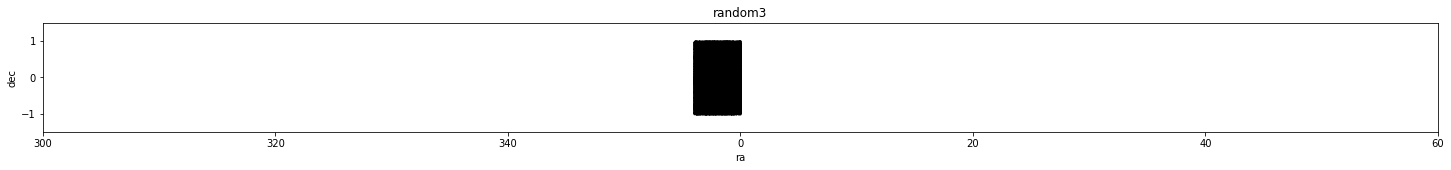

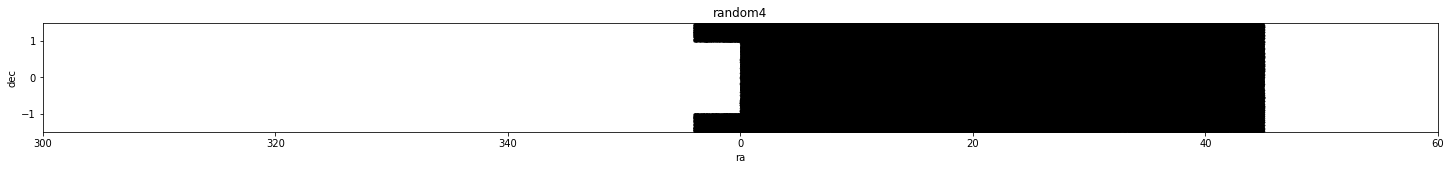

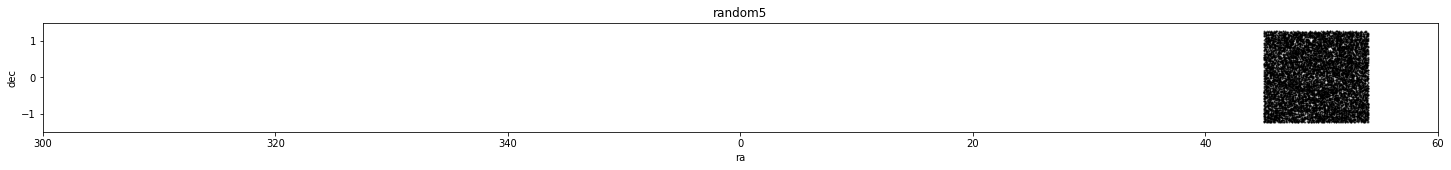

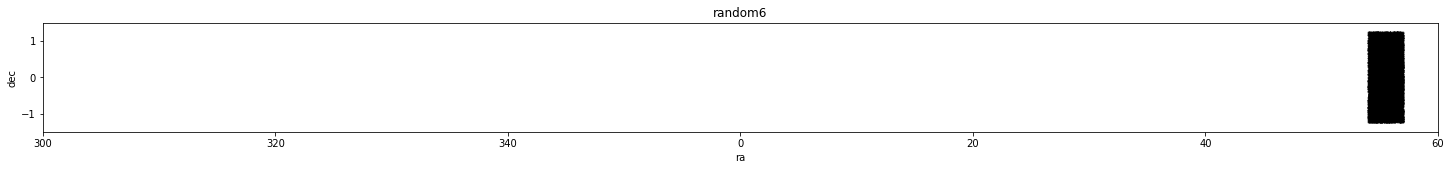

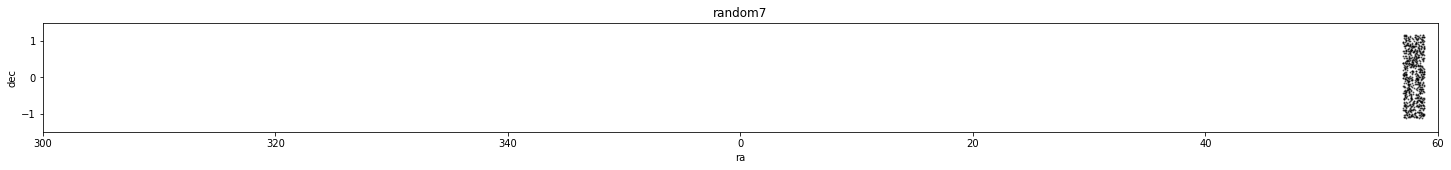

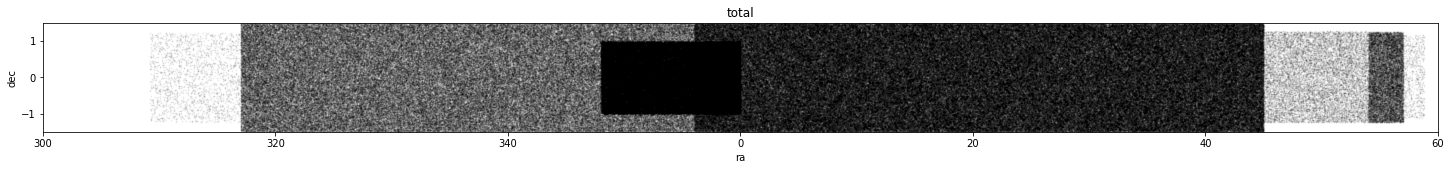

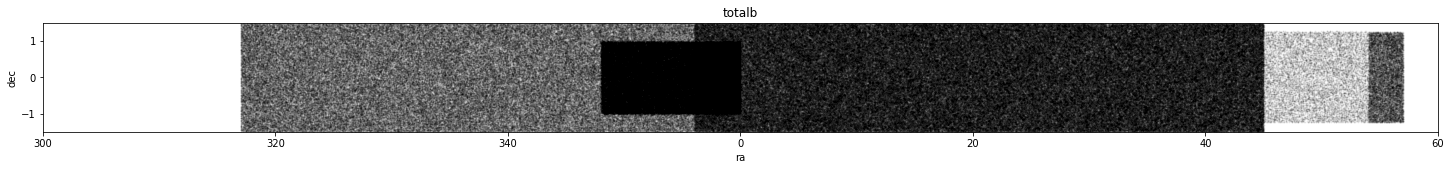

In [63]:
for i, patch in enumerate(random):
    pra = patch['ra']
    pdec = patch['dec']
    pra[pra > 180] -= 360
    fig, ax = plt.subplots(figsize=(25,2))
    ax.scatter(pra,pdec,1,color='k',alpha=(.05 if ((i==8)|(i==9)) else .5))
    ax.axis([-60,60,-1.5,1.5])
    ticks = ax.get_xticks()
    ticks[ticks < 0] += 360
    ax.set_xticklabels([int(tick) for tick in ticks])
    ax.set_xlabel('ra')
    ax.set_ylabel('dec')
    if (i==8):
        ax.set_title('total')
    elif (i==9):
        ax.set_title('totalb')
    else:
        ax.set_title('random'+str(i))

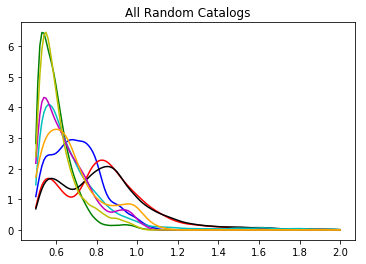

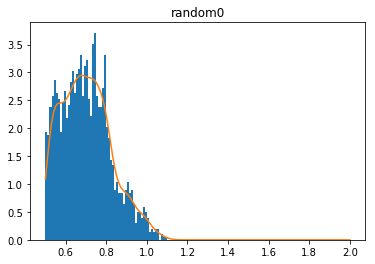

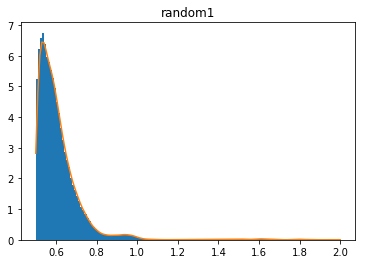

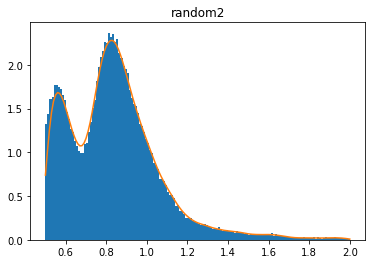

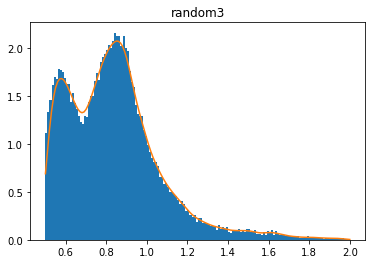

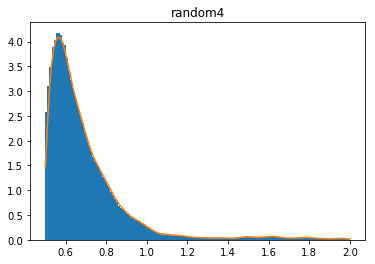

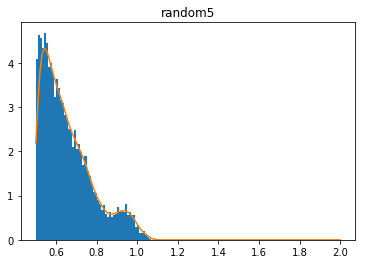

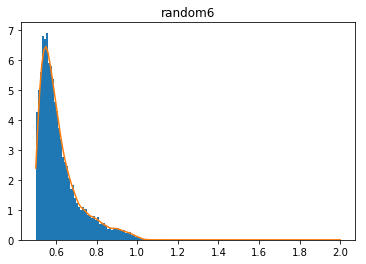

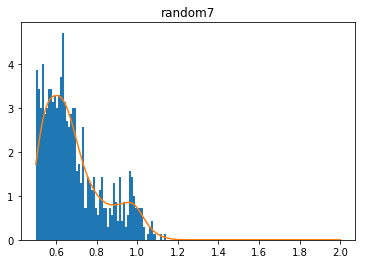

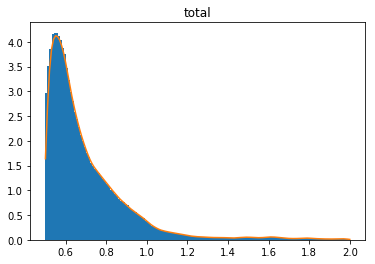

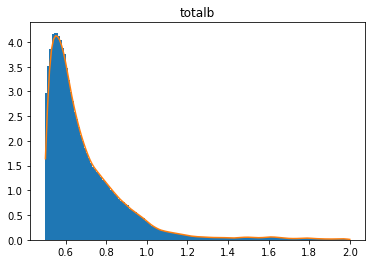

In [64]:
fig1, al = plt.subplots()
al.set_title('All Random Catalogs')
for i, ran in enumerate(random):
    kernel = stats.gaussian_kde(ran['z'])
    fig2, sm = plt.subplots()
    sm.hist(ran['z'],bins=b,density=True)
    evaluated=kernel.evaluate(b)
    sm.plot(b,evaluated)
    if (i==8):
        sm.set_title('total')
    elif (i==9):
        sm.set_title('totalb')
    else:
        al.plot(b,evaluated, color=colora[i])
        sm.set_title('random'+str(i))
#fig1.savefig('PatchNormZdist.pdf')

In [65]:
if (inc_lowz==False):
    random[8].write('random.fits', format='fits', overwrite=True)
    random[9].write('randomb.fits', format='fits', overwrite=True)
else:
    random[8].write('lowzrandom.fits', format='fits', overwrite=True)

In [66]:
pop[1]=rp1
pop[4]=rp4
random2=[]
for i, p in enumerate(patches):
    r,d,z=([] for i in range(3))
    d=[]
    z=[]
    q=CDF(evalu[i])
    inv=scipy.interpolate.interp1d(CDF(evalu[i]), b)
    for j in range (pop[i]):
        rinp=rand.randint(0,len(patches[i])-1)
        r.append(patches[i]['ra'][rinp])
        d.append(patches[i]['dec'][rinp])
        a=rand.uniform(q.min(),q.max())
        z.append(inv(a))   
    temp=Table([r, d, z], names=('ra', 'dec', 'z'), meta={'name': 'first table'})
    temp[temp['ra']<0]['ra']+=360
    random2.append(temp)

In [67]:
total2=Table([[],[],[]], names=('ra', 'dec', 'z'), meta={'name': 'first table'})
total2b=Table([[],[],[]], names=('ra', 'dec', 'z'), meta={'name': 'first table'})
for i, r in enumerate(random2):
    total2=vstack([total2,r])
    if((i!=0)&(i!=7)):
        total2b=vstack([total2b,r])
random2.append(total2)
random2.append(total2b)

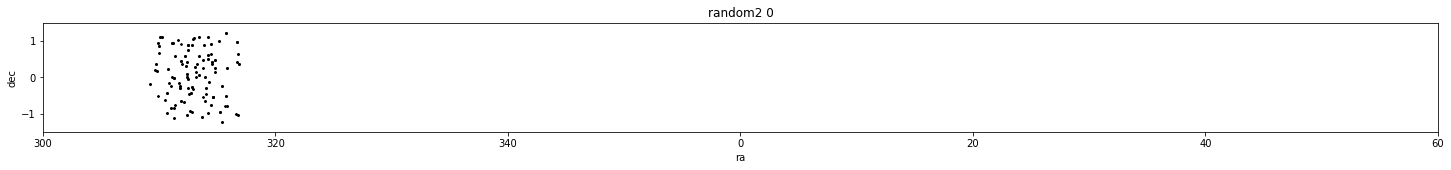

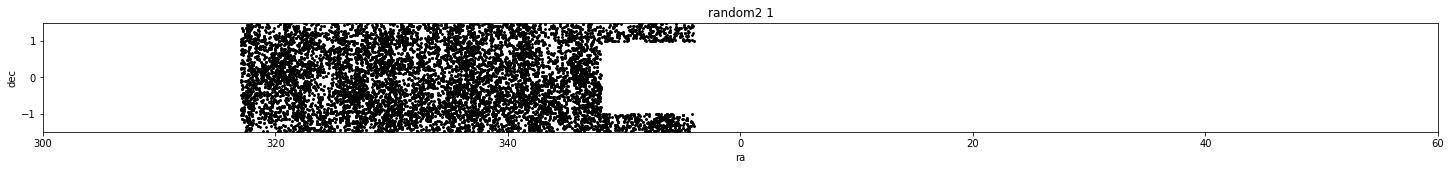

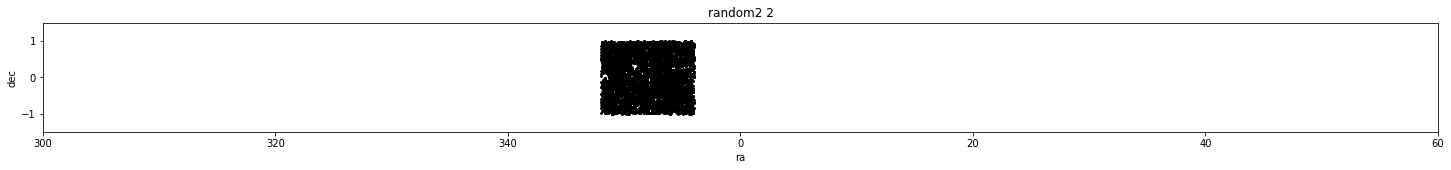

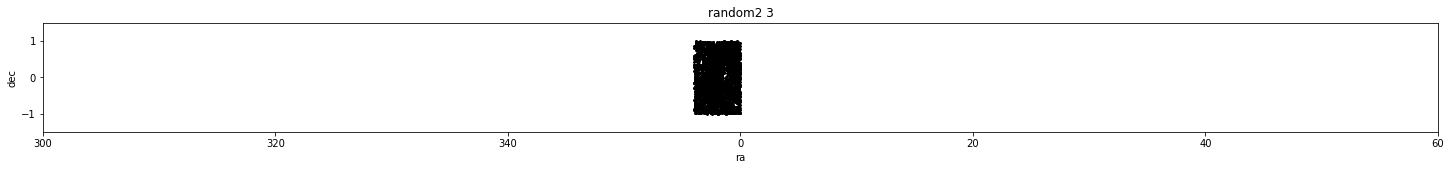

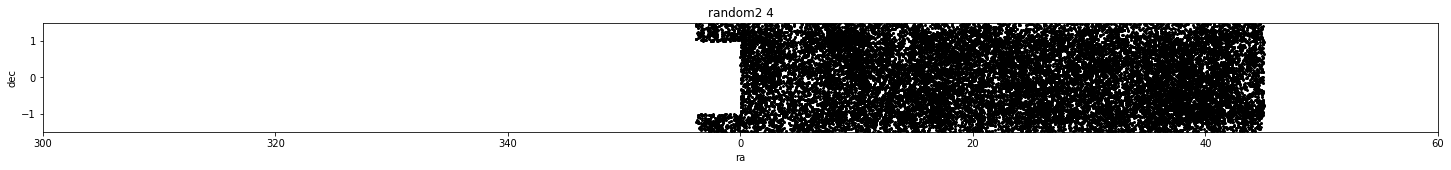

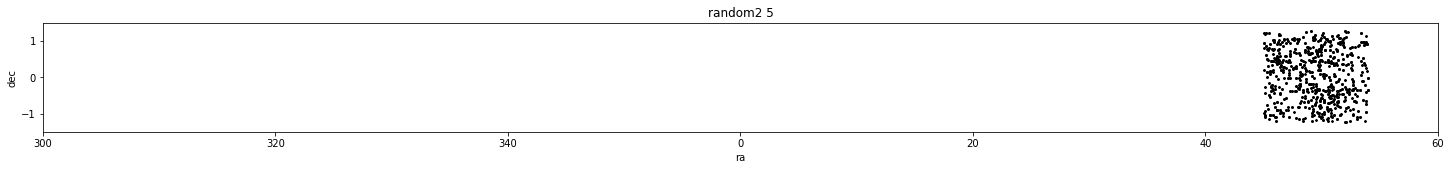

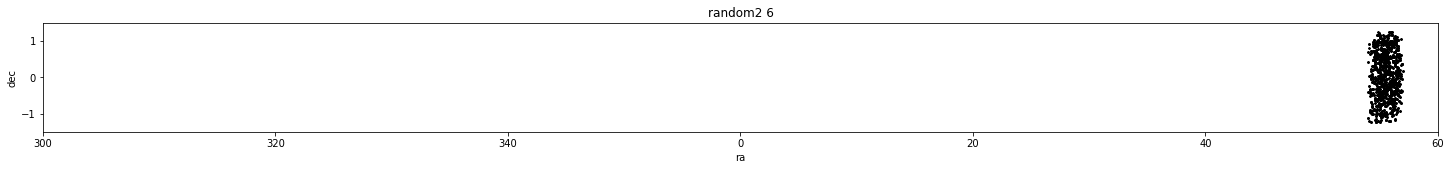

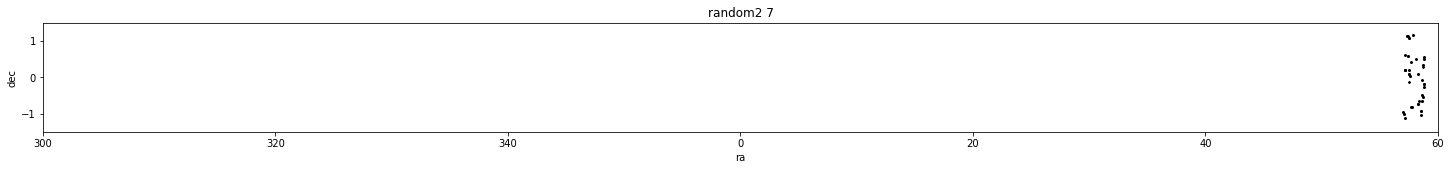

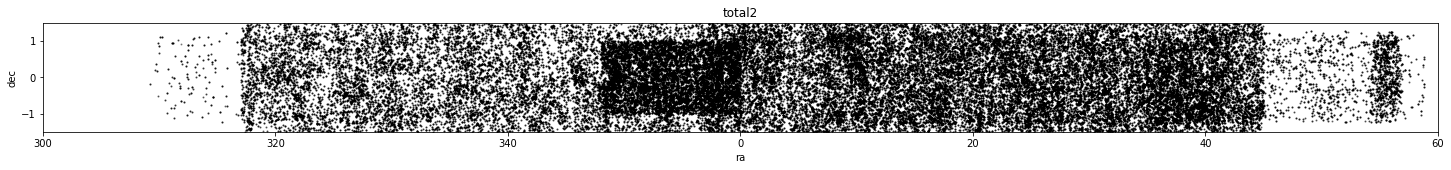

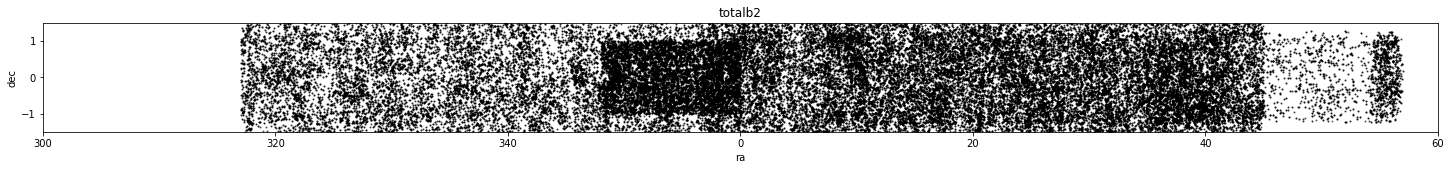

In [68]:
for i, patch in enumerate(random2):
    pra = patch['ra']
    pdec = patch['dec']
    pra[pra > 180] -= 360
    fig, ax = plt.subplots(figsize=(25,2))
    ax.scatter(pra,pdec,1,color='k',alpha=(.05 if ((i==8)|(i==9)) else .5))
    ax.axis([-60,60,-1.5,1.5])
    ticks = ax.get_xticks()
    ticks[ticks < 0] += 360
    ax.set_xticklabels([int(tick) for tick in ticks])
    ax.set_xlabel('ra')
    ax.set_ylabel('dec')
    if (i==8):
        ax.set_title('total2')
    elif (i==9):
        ax.set_title('totalb2')
    else:
        ax.set_title('random2 '+str(i))

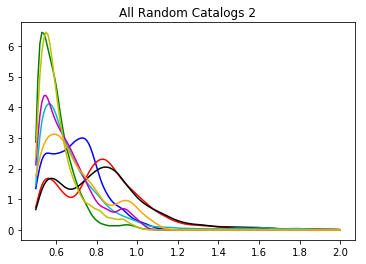

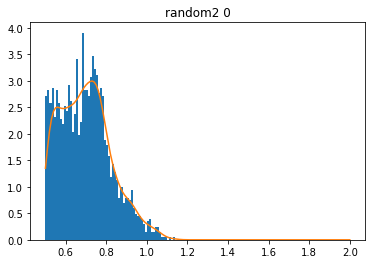

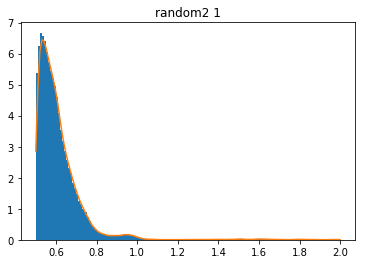

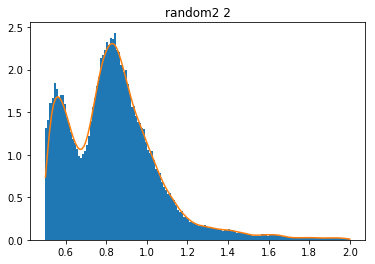

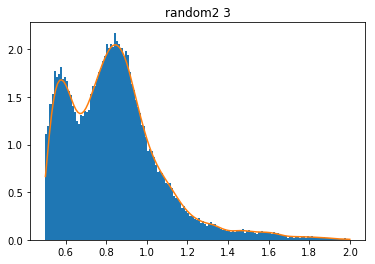

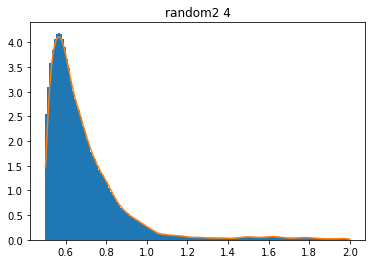

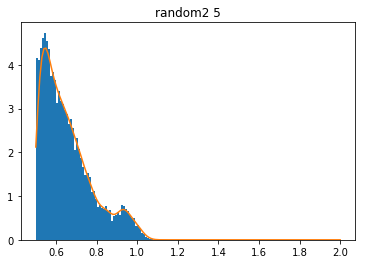

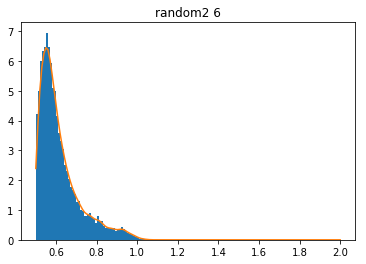

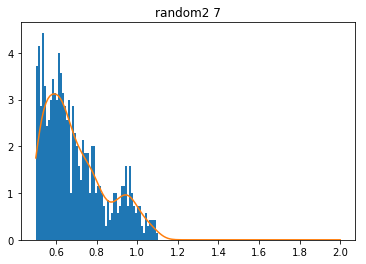

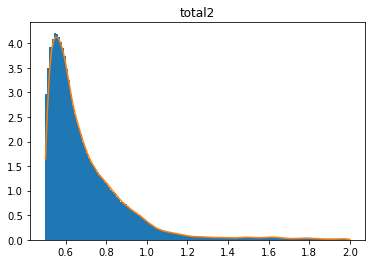

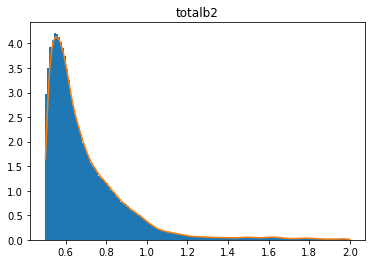

In [69]:
fig1, al = plt.subplots()
al.set_title('All Random Catalogs 2')
for i, ran in enumerate(random2):
    kernel = stats.gaussian_kde(ran['z'])
    fig2, sm = plt.subplots()
    sm.hist(ran['z'],bins=b,density=True)
    evaluated=kernel.evaluate(b)
    sm.plot(b,evaluated)
    if (i==8):
        sm.set_title('total2')
    elif (i==9):
        sm.set_title('totalb2')
    else:
        al.plot(b,evaluated, color=colora[i])
        sm.set_title('random2 '+str(i))
#fig1.savefig('PatchNormZdist.pdf')

In [70]:
if (inc_lowz==False):
    random2[8].write('random2.fits', format='fits', overwrite=True)
    random2[9].write('randomb2.fits', format='fits', overwrite=True)

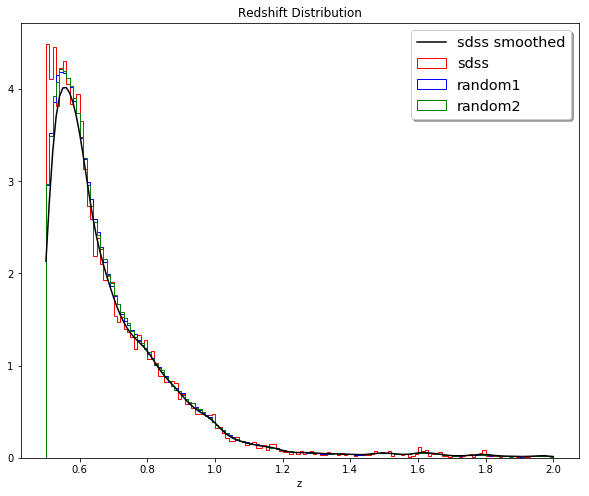

In [71]:
fig, ax = plt.subplots(figsize=(10,8))
ax.hist(SDSS['z'],bins=b,density=True, histtype='step', color='r', label='sdss')
ax.hist(random[8]['z'],bins=b,density=True, histtype='step', color='b', label='random1')
ax.hist(random2[8]['z'],bins=b,density=True, histtype='step', color='g', label='random2')
kernel = stats.gaussian_kde(SDSS['z'])
evaluated=kernel.evaluate(b)
ax.plot(b,evaluated, color='k', label='sdss smoothed')
ax.set_xlabel('z')
ax.set_title('Redshift Distribution')
legend = ax.legend(loc='upper right', shadow=True, fontsize='x-large')
#fig.savefig('RandomNormZdist.pdf')

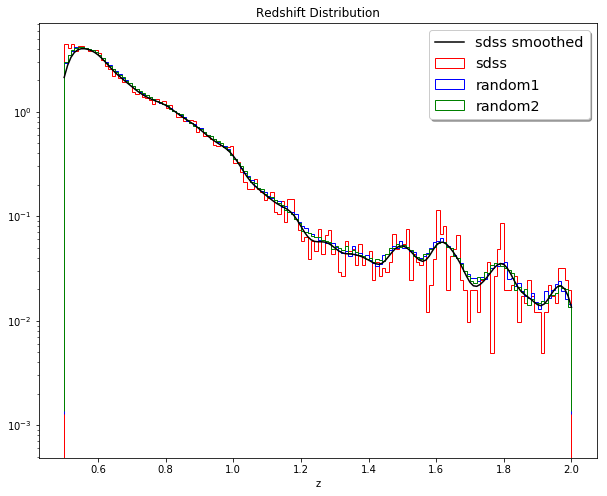

In [72]:
fig, ax = plt.subplots(figsize=(10,8))
ax.hist(SDSS['z'],bins=b,density=True, histtype='step', color='r', label='sdss', log=True)
ax.hist(random[8]['z'],bins=b,density=True, histtype='step', color='b', label='random1', log=True)
ax.hist(random2[8]['z'],bins=b,density=True, histtype='step', color='g', label='random2', log=True)
kernel = stats.gaussian_kde(SDSS['z'])
evaluated=kernel.evaluate(b)
ax.plot(b,evaluated, color='k', label='sdss smoothed')
ax.set_xlabel('z')
ax.set_title('Redshift Distribution')
legend = ax.legend(loc='upper right', shadow=True, fontsize='x-large')
#fig.savefig('LogRandomNormZdist.pdf')

In [73]:
notify("Notebook Complete","Random Catalog")